In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [92]:
df = pd.read_excel('data/egatur_total_españa.xlsx', engine='openpyxl')

In [93]:
df.head()

,AÑO,MES,TIPO_VISITANTE,PERNOCTACIONES,GASTO_TOTAL
0,2015,10,Turista no residente (no tránsito),58846,6.134141e+09
1,2015,11,Turista no residente (no tránsito),61720,3.764707e+09
2,2015,12,Turista no residente (no tránsito),76994,3.678380e+09
3,2016,1,Turista no residente (no tránsito),60931,3.607937e+09
4,2016,2,Turista no residente (no tránsito),53764,3.622012e+09


In [94]:
df.dtypes

AÑO                 int64
MES                 int64
TIPO_VISITANTE     object
PERNOCTACIONES      int64
GASTO_TOTAL       float64
dtype: object

In [95]:
df.isnull().sum().sum()

0

In [96]:
# como tenemos que tratar con datos de años vamos a ver si tenemos todos los datos
años_unicos = df['AÑO'].unique()

# Ordenar los años únicos para una mejor visualización
años_unicos_ordenados = sorted(años_unicos)

print("Años únicos en el dataset:", años_unicos_ordenados)


Años únicos en el dataset: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [97]:
# vemos si faltan meses
conteo_meses_por_año = df.groupby('AÑO')['MES'].nunique()

print(conteo_meses_por_año)


AÑO
2015     3
2016    12
2017    12
2018    12
2019    12
2020    10
2021    12
2022    12
2023    12
Name: MES, dtype: int64


In [98]:
# Para ver los meses específicos presentes para cada año
meses_por_año = df.groupby('AÑO')['MES'].unique().apply(sorted)  # Aplica sorted para ordenar los meses

print(meses_por_año)


AÑO
2015                               [10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2019    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2020          [1, 2, 3, 6, 7, 8, 9, 10, 11, 12]
2021    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2022    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2023    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: MES, dtype: object


In [ ]:
# efectivamente, faltan los meses 4 y 5 del 2020, por la pandemia no se tomaron datos esos meses entonces

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AÑO,97.0,2.019351e+03,2.419716e+00,2.015000e+03,2.017000e+03,2.019000e+03,2.021000e+03,2.023000e+03
MES,97.0,6.680412e+00,3.528297e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
PERNOCTACIONES,97.0,6.345265e+04,1.468042e+04,1.770200e+04,5.405200e+04,6.111700e+04,7.098500e+04,1.121870e+05
GASTO_TOTAL,97.0,6.047929e+09,3.163597e+09,1.187516e+08,4.125504e+09,5.475405e+09,8.120745e+09,1.322450e+10


In [100]:
# vamos a ver qué tipos distintos tenemos de visitante para ver si interesa o no el dato
visitante_tipo = df['TIPO_VISITANTE'].unique()
visitante_tipo

array(['Turista no residente (no tránsito)'], dtype=object)

In [101]:
df1 = df.drop('TIPO_VISITANTE', axis=1)
df1.head()

,AÑO,MES,PERNOCTACIONES,GASTO_TOTAL
0,2015,10,58846,6.134141e+09
1,2015,11,61720,3.764707e+09
2,2015,12,76994,3.678380e+09
3,2016,1,60931,3.607937e+09
4,2016,2,53764,3.622012e+09


In [102]:
# vamos a juntar año y mes para una sola columna y luego poner de index
df1['AÑO'] = df1['AÑO'].astype(str)

# Convertimos 'MES' a string y asegurarse de que tenga dos dígitos
df1['MES'] = df1['MES'].astype(str).str.zfill(2)

# Creamos concatenando 'AÑO' y 'MES'
df1['FECHA'] = df1['AÑO'] + "-" + df1['MES']


In [103]:
df1 = df1.drop(['AÑO', 'MES'], axis=1)

In [104]:

print(df1.head())

   PERNOCTACIONES   GASTO_TOTAL    FECHA
0           58846  6.134141e+09  2015-10
1           61720  3.764707e+09  2015-11
2           76994  3.678380e+09  2015-12
3           60931  3.607937e+09  2016-01
4           53764  3.622012e+09  2016-02


In [105]:
# no podemos tener los datos de años o mejor dicho de fecha vacíos
# Creamos nuevas filas para abril y mayo de 2020
nuevas_filas = pd.DataFrame({
    'PERNOCTACIONES': [None, None],
    'GASTO_TOTAL': [None, None],
    'FECHA': ['2020-04', '2020-05']
})

# Añadir las nuevas filas al DataFrame original
df1 = pd.concat([df1, nuevas_filas], ignore_index=True)


In [16]:
df1

,PERNOCTACIONES,GASTO_TOTAL,FECHA
0,58846,6.134141e+09,2015-10
1,61720,3.764707e+09,2015-11
2,76994,3.678380e+09,2015-12
3,60931,3.607937e+09,2016-01
4,53764,3.622012e+09,2016-02
...,...,...,...
94,61624,9.769557e+09,2023-10
95,49223,6.403578e+09,2023-11
96,61117,6.857179e+09,2023-12
97,None,NaN,2020-04


In [106]:
# como quedan los dos nuevos valores en la parte de abajo, los pasamos a datetime y luego ordenamos
df1['FECHA'] = pd.to_datetime(df1['FECHA'], infer_datetime_format=True)

In [107]:
df1.sort_values('FECHA', inplace=True)


In [108]:
# efectivamente tenemos como nulos esos cuatro valores nuevos
df1.isnull().sum()

PERNOCTACIONES    2
GASTO_TOTAL       2
FECHA             0
dtype: int64

In [109]:
# vamos a proceder a imputar por vecinos los valores faltantes 
from sklearn.impute import KNNImputer

In [124]:
# Inicializa el imputador KNN
imputer = KNNImputer(n_neighbors=2)

# Selecciona las columnas para imputar
columnas_para_imputar = ['PERNOCTACIONES', 'GASTO_TOTAL']

# Aplica la imputación KNN
df1[columnas_para_imputar] = imputer.fit_transform(df1[columnas_para_imputar])


In [125]:
df1.isnull().sum()

PERNOCTACIONES    0
GASTO_TOTAL       0
dtype: int64

In [126]:
df1.dtypes

PERNOCTACIONES    float64
GASTO_TOTAL       float64
dtype: object

In [112]:
df1.set_index('FECHA', inplace=True)


In [ ]:
# ahora que tenemos los datos preparados, vamos a graficar el histórico

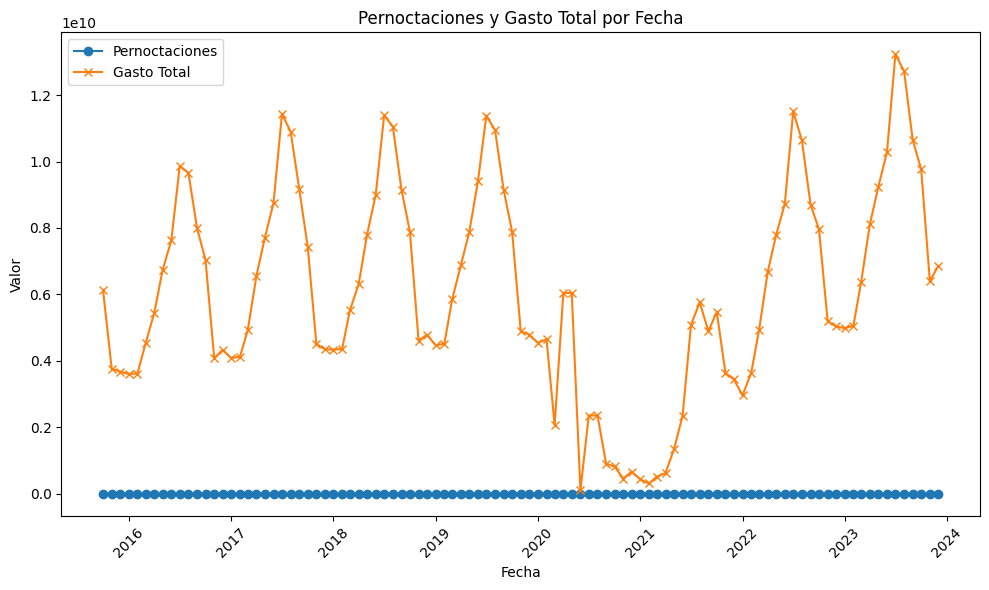

In [127]:

# lineplot para "PERNOCTACIONES" y "GASTO_TOTAL"
plt.figure(figsize=(10, 6))  

# Dibujar la línea para "PERNOCTACIONES"
plt.plot(df1.index, df1['PERNOCTACIONES'], label='Pernoctaciones', marker='o')

# Dibujar la línea para "GASTO_TOTAL"
plt.plot(df1.index, df1['GASTO_TOTAL'], label='Gasto Total', marker='x')

# Añadir leyenda para distinguir las líneas
plt.legend()

# Añadir título y etiquetas para los ejes
plt.title('Pernoctaciones y Gasto Total por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Mejorar la disposición y mostrar el gráfico
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
# vemos que no tiene mucho sentido hacer el lineplot de ambos valores juntos
# vamos a separarlos y luego haremos otra cosa para juntarlos en la misma gráfica

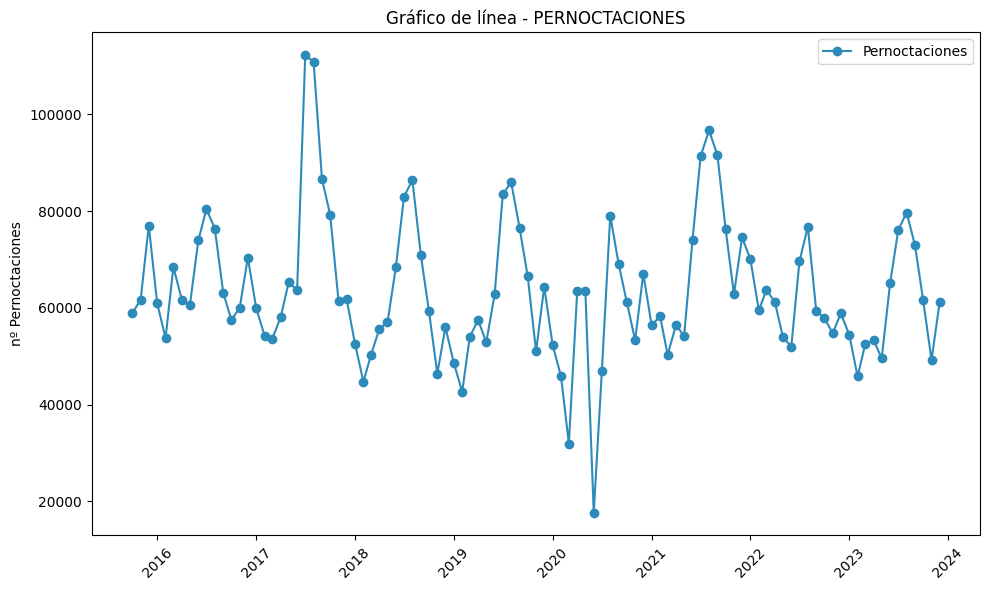

In [128]:
# Gráfico para "PERNOCTACIONES"
plt.figure(figsize=(10, 6))  
plt.plot(df1.index, df1['PERNOCTACIONES'], label='Pernoctaciones', marker='o', color='#2d8bba')
plt.title('Gráfico de línea - PERNOCTACIONES')
plt.xlabel('')
plt.ylabel('nº Pernoctaciones')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('grafico_linea_pernoctaciones.svg', format='svg', dpi=300)
plt.tight_layout()
plt.show()


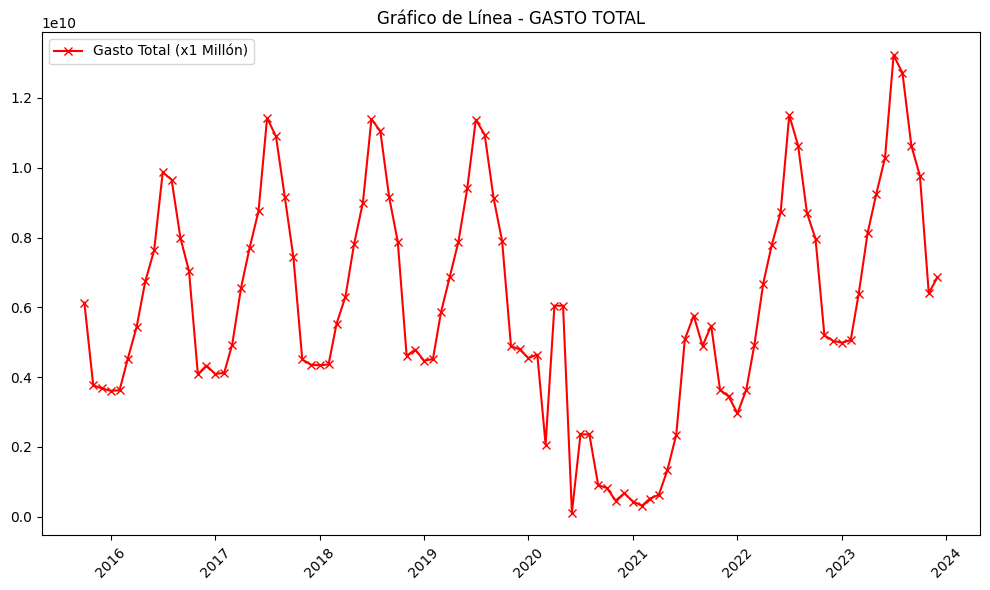

In [129]:
plt.figure(figsize=(10, 6))  
plt.plot(df1.index, df1['GASTO_TOTAL'], label='Gasto Total (x1 Millón)', marker='x', color='red')
plt.title('Gráfico de Línea - GASTO TOTAL')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('grafico_linea_gasto.svg', format='svg', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
# no me gusta que se vean los yticks así voy a escalarlos y a establecerlos y le añadiré x1000 en la leyenda o algo

In [ ]:
# Para visualizar la evolución de "PERNOCTACIONES" y "GASTO_TOTAL" en el mismo gráfico y facilitar su comparación, 
# especialmente cuando hay grandes diferencias en sus escalas de valores, una opción efectiva es utilizar dos ejes Y distintos: 
# uno para cada conjunto de datos. Esto te permite mantener la escala original de cada conjunto de datos sin necesidad de recurrir 
# a una escala logarítmica, aunque la escala logarítmica también es una opción viable en ciertos contextos.

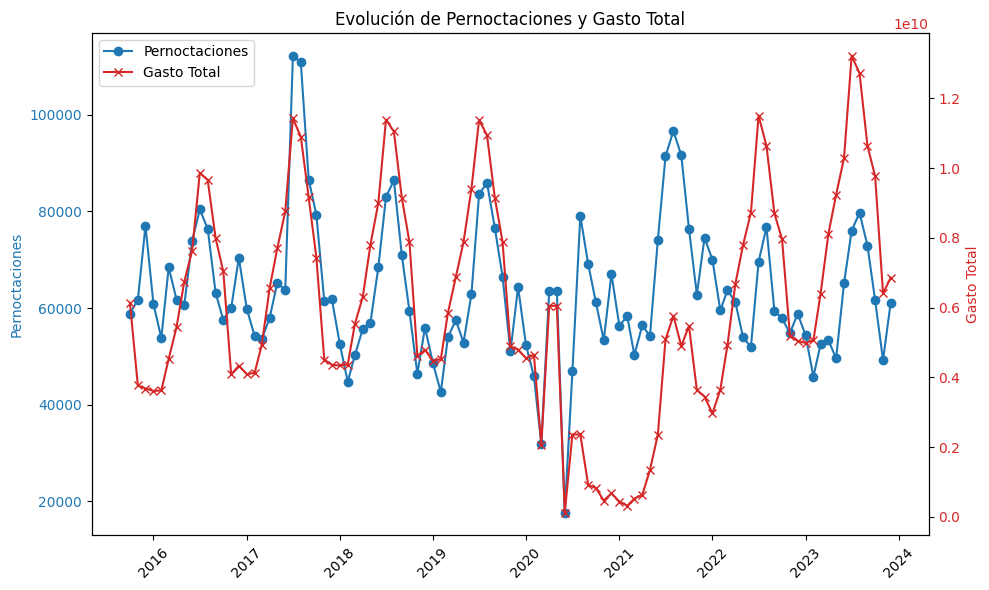

In [131]:
#Creamos figura y eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Dibujamos "PERNOCTACIONES" en el eje Y principal
color = 'tab:blue'
ax1.set_xlabel('')
ax1.set_ylabel('Pernoctaciones', color=color)
ax1.plot(df1.index, df1['PERNOCTACIONES'], color=color, marker='o', label='Pernoctaciones')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje X para mejorar la legibilidad

# Creamos un segundo eje Y que comparte el mismo eje X
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Gasto Total', color=color)
ax2.plot(df1.index, df1['GASTO_TOTAL'], color=color, marker='x', label='Gasto Total')
ax2.tick_params(axis='y', labelcolor=color)

# Añadimos título y mejorar disposición
plt.title('Evolución de Pernoctaciones y Gasto Total')
fig.tight_layout()

# La leyenda puede ser un poco más compleja debido a los dos ejes Y, así que se pueden añadir manualmente
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.savefig('grafico_linea_paralelo.svg', format='svg', dpi=300)
plt.show()

In [169]:
### PREDICCIONES 

In [170]:
# REGRESION LINEAL

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import timedelta

In [133]:
# Creamos copia para quitar el warning 
df1 = df1.copy()

# Ahora, al asignar valores a la nueva columna 'tiempo', lo haces sobre una copia,
# lo cual elimina el riesgo de modificar inadvertidamente el DataFrame original
df1['tiempo'] = range(len(df1))


# Preparar los datos
X = df1[['tiempo']]  # Características: 'tiempo' como un valor secuencial
y = df1['PERNOCTACIONES']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [134]:
# Entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 122044594.01452017


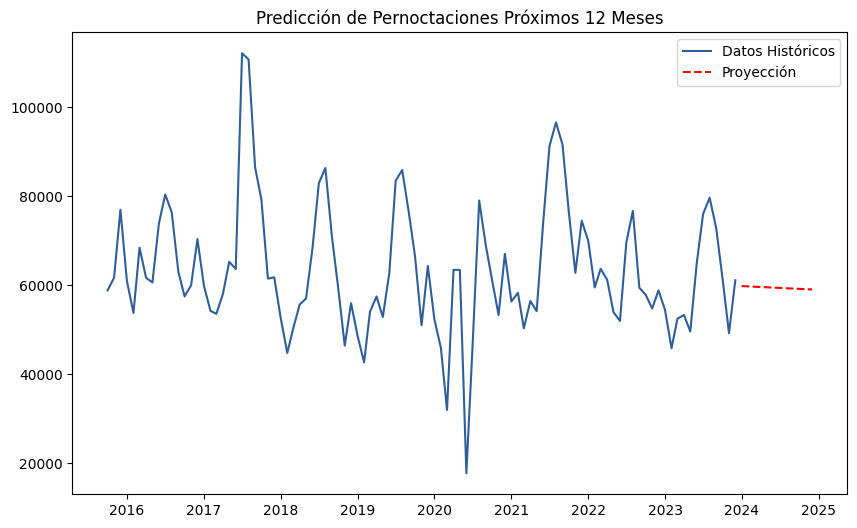

In [139]:
# Calculamos el próximo valor 'tiempo' después del último dato
next_time_value = df1['tiempo'].iloc[-1] + 1

# Crear un DataFrame para los próximos 12 meses
future_times = pd.DataFrame({'tiempo': range(next_time_value, next_time_value + 12)})

# Hacer predicciones futuras
future_predictions = model.predict(future_times)

# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(df1.index, y, label='Datos Históricos', color='#2f5f98')
future_dates = pd.date_range(start=df1.index[-1] + timedelta(days=1), periods=12, freq='M')
plt.plot(future_dates, future_predictions, label='Proyección', linestyle='--', color='red')
plt.xlabel('')
plt.ylabel('')
plt.title('Predicción de Pernoctaciones Próximos 12 Meses')
plt.legend()
plt.savefig('prediccion_pernoctaciones.svg', format='svg')
plt.show()


In [ ]:
# vamos a hacer lo mismo para la columna gasto total

In [140]:
df1 = df1.copy()

# Ahora, al asignar valores a la nueva columna 'tiempo', lo haces sobre una copia,
# lo cual elimina el riesgo de modificar inadvertidamente el DataFrame original
df1['tiempo'] = range(len(df1))


# Preparar los datos
X = df1[['tiempo']]  # Características: 'tiempo' como un valor secuencial
y = df1['GASTO_TOTAL']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [141]:
# Entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 8.16050509734169e+18


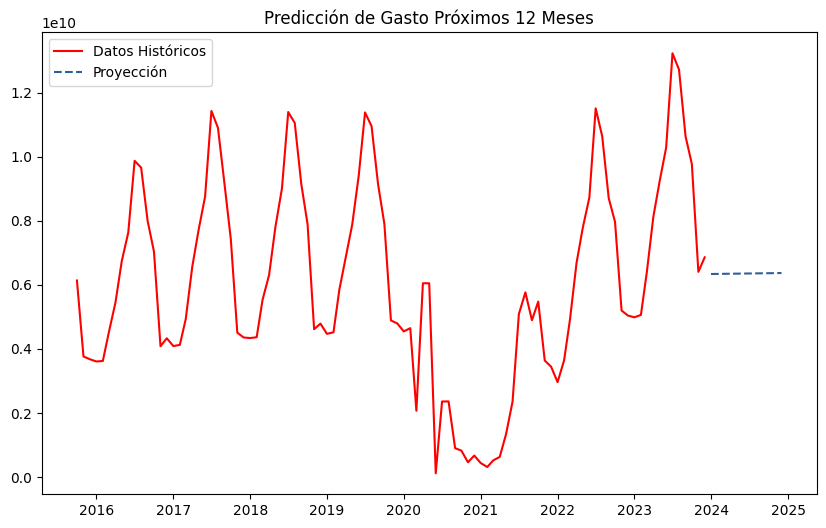

In [142]:
# Calculamos el próximo valor 'tiempo' después del último dato
next_time_value = df1['tiempo'].iloc[-1] + 1

# Crear un DataFrame para los próximos 12 meses
future_times = pd.DataFrame({'tiempo': range(next_time_value, next_time_value + 12)})

# Hacer predicciones futuras
future_predictions = model.predict(future_times)

# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(df1.index, y, label='Datos Históricos', color='red')
future_dates = pd.date_range(start=df1.index[-1] + timedelta(days=1), periods=12, freq='M')
plt.plot(future_dates, future_predictions, label='Proyección', linestyle='--', color='#2f5f98')
plt.xlabel('')
plt.ylabel('')
plt.title('Predicción de Gasto Próximos 12 Meses')
plt.legend()
plt.savefig('prediccion_gasto.svg', format='svg')
plt.show()

In [ ]:
# GRADIENT BOOSTING

In [195]:
from sklearn.ensemble import GradientBoostingRegressor

In [196]:
# Convertimos las fechas en un número secuencial
df1['tiempo'] = range(len(df1))

# características y la variable objetivo
X = df1[['tiempo']]  # 'tiempo' como característica
y = df1['PERNOCTACIONES']  # Pernoctaciones variable objetivo

# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [197]:
# Inicializamos y entrenar el modelo de Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=45)
gb_reg.fit(X_train, y_train)

# Evaluar el modelo
y_pred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE en el conjunto de prueba: {mse}')

MSE en el conjunto de prueba: 81792098.92788672


In [198]:
# Generamos características futuras para los próximos 12 meses
last_time_value = df1['tiempo'].iloc[-1]
future_times = pd.DataFrame({'tiempo': range(last_time_value + 1, last_time_value + 13)})

# Realizamos  predicciones futuras
future_predictions = gb_reg.predict(future_times)

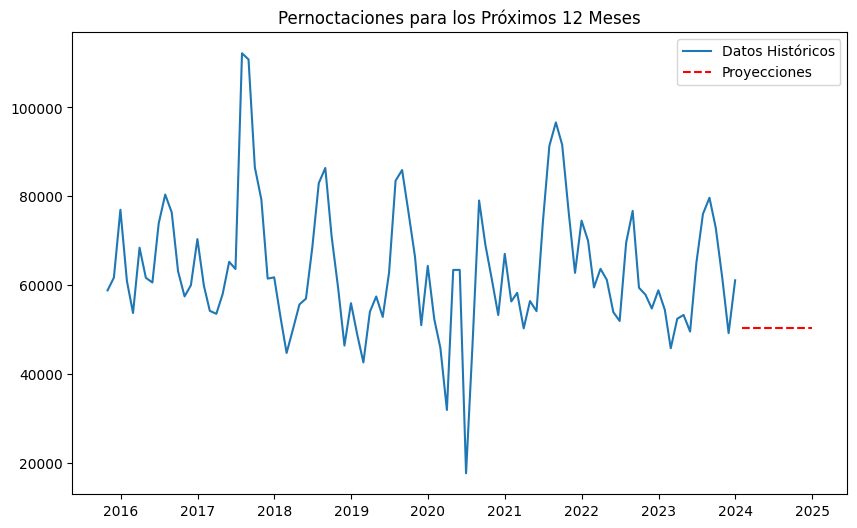

In [200]:

# nos aseguramos de que el número de periodos en date_range sea igual al número de predicciones
future_dates = pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions), freq='M')

# Graficar los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['PERNOCTACIONES'], label='Datos Históricos')

# Graficar las predicciones futuras
plt.plot(future_dates, future_predictions, label='Proyecciones', linestyle='--', color='red')
plt.title('Pernoctaciones para los Próximos 12 Meses')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.savefig('gradient_booster_pernoctaciones.svg', format='svg')
plt.show()

In [ ]:
# VAMOS A HACERLO AHORA PARA GASTO_TOTAL

In [201]:
# Convertimos las fechas en un número secuencial
df1['tiempo'] = range(len(df1))

# Características y la variable objetivo
X = df1[['tiempo']]  # 'tiempo' como característica
y = df1['GASTO_TOTAL']  # Cambiado a GASTO_TOTAL

# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Inicializamos y entrenamos el modelo de Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=45)
gb_reg.fit(X_train, y_train)

# Evaluar el modelo
y_pred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE en el conjunto de prueba: {mse}')




MSE en el conjunto de prueba: 1.7966466518381133e+18


In [202]:
# Generamos características futuras para los próximos 12 meses
last_time_value = df1['tiempo'].iloc[-1]
future_times = pd.DataFrame({'tiempo': range(last_time_value + 1, last_time_value + 13)})

# Realizamos predicciones futuras
future_predictions = gb_reg.predict(future_times)

# Nos aseguramos de que el número de periodos en date_range sea igual al número de predicciones
future_dates = pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions), freq='M')



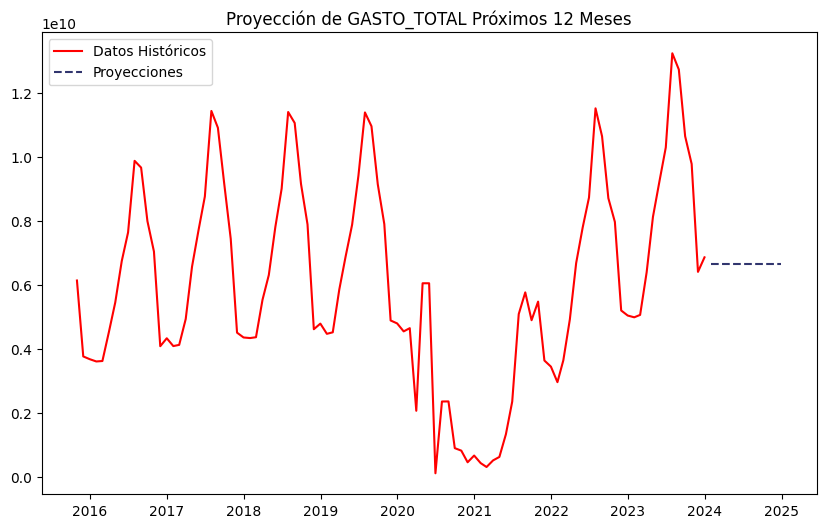

In [205]:
# Graficar los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['GASTO_TOTAL'], label='Datos Históricos', color='red')  # Cambiado a GASTO_TOTAL

# Graficar las predicciones futuras
plt.plot(future_dates, future_predictions, label='Proyecciones', linestyle='--', color='#31356e')
plt.title('Proyección de GASTO_TOTAL Próximos 12 Meses')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.savefig('gradient_booster_gasto_total.svg', format='svg')
plt.show()

In [ ]:
# SARIMAX

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df1.index = pd.DatetimeIndex(df1.index).to_period('M')

In [154]:
# Ajustamos el modelo SARIMA con los parámetros identificados

model = SARIMAX(df1['PERNOCTACIONES'], order=(1, 2, 1), seasonal_order=(1, 2, 1, 12))
results = model.fit()

# Imprimimos el resumen del modelo
print(results.summary())

# Para hacer predicciones futuras:
predicciones = results.forecast(steps=12) # Predecir los próximos 12 meses

                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   99
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -839.437
Date:                            Mon, 12 Feb 2024   AIC                           1688.875
Time:                                    23:21:34   BIC                           1700.327
Sample:                                10-31-2015   HQIC                          1693.439
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1015      0.769     -0.132      0.895      -1.608       1.405
ma.L1         -0.9222      0.435   

In [156]:
# Los warnings del principio indican que no hemos indicado la frecuencia de los datos. La introducimos con el siguiente código:
# df1 = df1.asfreq('MS')

In [157]:
# Ajustar el modelo SARIMA con los parámetros identificados
model = SARIMAX(df1['PERNOCTACIONES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Para hacer predicciones futuras, puedes usar:
predicciones = results.forecast(steps=12) # Predecir los próximos 12 meses

                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   99
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -931.670
Date:                            Mon, 12 Feb 2024   AIC                           1873.340
Time:                                    23:22:29   BIC                           1885.611
Sample:                                10-31-2015   HQIC                          1878.278
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6228      0.422      1.475      0.140      -0.205       1.450
ma.L1         -0.8037      0.327   

In [158]:
print(df1.index)

PeriodIndex(['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
             '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
             '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
             '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
             '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
             '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
             '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
             '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
             '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11', '2021-12', '2022-

In [ ]:
# En mi caso, el primero dato que tengo en el index es 2015-10 y el último 2023-12. Así pues modifico el código:

In [159]:
df1.index = pd.date_range(start='2015-10', periods=len(df1), freq='M')

In [171]:
# Vuelvo a introducir el código anterior para obtener los resultados sin los warnings sobre el índice temporal

In [160]:
model = SARIMAX(df1['PERNOCTACIONES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Para hacer predicciones futuras, puedes usar:
predicciones = results.forecast(steps=12) # Predecir los próximos 12 meses

                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   99
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -931.670
Date:                            Mon, 12 Feb 2024   AIC                           1873.340
Time:                                    23:23:10   BIC                           1885.611
Sample:                                10-31-2015   HQIC                          1878.278
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6228      0.422      1.475      0.140      -0.205       1.450
ma.L1         -0.8037      0.327   

In [ ]:
# Suponiendo que df es tu DataFrame y 'impacto_covid' es la columna binaria que has creado
df1['impacto_covid'] = [1 if '2020-03' <= str(index) <= '2020-10' else 0 for index in df1.index]

In [166]:
model = SARIMAX(df1['PERNOCTACIONES'], exog=df1[['impacto_covid']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Hacer predicciones futuras considerando la variable exógena
# Suponiendo que tienes un DataFrame futuro_df para predicciones que también incluye la columna 'impacto_covid'
# future_predictions = results.get_forecast(steps=24, exog=futuro_df[['impacto_covid']])


                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   99
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -930.690
Date:                            Mon, 12 Feb 2024   AIC                           1873.381
Time:                                    23:27:23   BIC                           1888.107
Sample:                                10-31-2015   HQIC                          1879.307
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
impacto_covid  -1.02e+04   1.19e+04     -0.860      0.390   -3.34e+04     1.3e+04
ar.L1             0.6094  

In [167]:
# Supongamos que queremos predecir los próximos 12 meses y asumimos que no habrá impacto del COVID-19
future_exog = pd.DataFrame({'COVID_impact': [0]*12})  # Crear un DataFrame con la variable exógena futura

predicciones = results.get_forecast(steps=12, exog=future_exog)


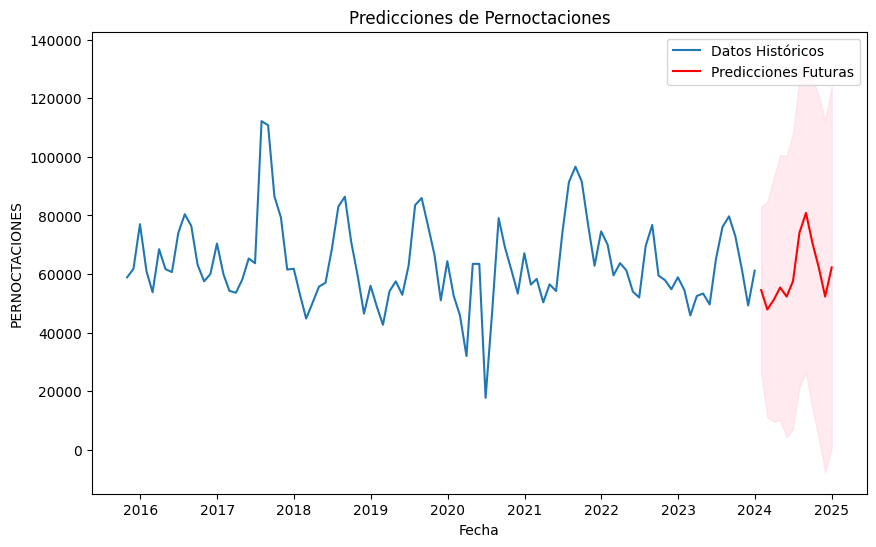

In [173]:
pred_conf = predicciones.conf_int()  # Intervalos de confianza de las predicciones

# Gráfico de los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['PERNOCTACIONES'], label='Datos Históricos')

# Gráfico de las predicciones futuras
future_dates = pd.date_range(start=df1.index[-1], periods=13, freq='M')[1:]
plt.plot(future_dates, predicciones.predicted_mean, label='Predicciones Futuras', color='red')

# Rellenar el intervalo de confianza
plt.fill_between(future_dates, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Fecha')
plt.ylabel('PERNOCTACIONES')
plt.title('Predicciones de Pernoctaciones')
plt.legend()
plt.savefig('sarimax_pernoctaciones.svg', format='svg')
plt.show()


In [ ]:
### SARIMAX PARA GASTO_TOTAL

In [185]:
modelo_gasto = SARIMAX(df1['GASTO_TOTAL'],
                       order=(1, 2, 3),  # Cambia estos parámetros basado en tu análisis
                       seasonal_order=(1, 2, 1, 12),  # Cambia estos parámetros basado en tu análisis
                       enforce_stationarity=False,
                       enforce_invertibility=True)

resultados_gasto = modelo_gasto.fit()
print(resultados_gasto.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          GASTO_TOTAL   No. Observations:                   99
Model:             SARIMAX(1, 2, 3)x(1, 2, [1], 12)   Log Likelihood               -1307.697
Date:                              Tue, 13 Feb 2024   AIC                           2629.393
Time:                                      00:35:57   BIC                           2643.694
Sample:                                  10-31-2015   HQIC                          2634.951
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5172      0.601     -0.860      0.390      -1.696       0.661
ma.L1         -0.15

In [187]:
modelo_gasto_covid = SARIMAX(df1['GASTO_TOTAL'],
                             exog=df1['impacto_covid'],
                             order=(1, 2, 3),
                             seasonal_order=(1, 2, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=True)
resultados_gasto_covid = modelo_gasto_covid.fit()


c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [188]:
future_impacto_covid = pd.DataFrame({'impacto_covid': [0]*12},
                                    index=pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'))


In [189]:
predicciones_gasto = resultados_gasto_covid.get_forecast(steps=12, exog=future_impacto_covid)


In [190]:
print(resultados_gasto_covid.summary())


                                      SARIMAX Results                                       
Dep. Variable:                          GASTO_TOTAL   No. Observations:                   99
Model:             SARIMAX(1, 2, 3)x(1, 2, [1], 12)   Log Likelihood               -1306.885
Date:                              Tue, 13 Feb 2024   AIC                           2629.771
Time:                                      00:46:15   BIC                           2646.115
Sample:                                  10-31-2015   HQIC                          2636.123
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
impacto_covid -2.203e+09   2.22e-09  -9.92e+17      0.000    -2.2e+09    -2.2e+09
ar.L1     

In [191]:
# intervalos de confianza
pred_conf = predicciones_gasto.conf_int()

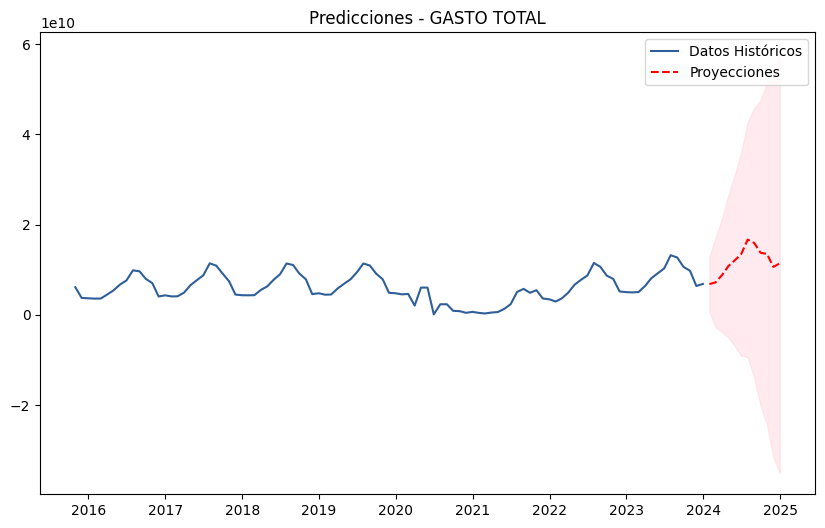

In [194]:
# Gráfico de los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['GASTO_TOTAL'], label='Datos Históricos', color='#2f5f98')

# Gráfico de las predicciones futuras
# ojo future_dates tiene el rango de fechas correcto para las predicciones
future_dates = [pd.Timestamp(date) for date in future_impacto_covid.index]
plt.plot(future_dates, predicciones_gasto.predicted_mean, label='Proyecciones', color='red', linestyle='--')

# Rellenamos con el intervalo de confianza
plt.fill_between(future_dates, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('')
plt.ylabel('')
plt.title('Predicciones - GASTO TOTAL')
plt.legend()
plt.savefig('sarimax_gasto.svg', format='svg')
plt.show()



In [ ]:

### CODIGO CORREGIDO Y SIMPLIFICADO DE SARIMAX x CHATGPT


In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Asegúrate de que el índice está en formato de fecha adecuado para manipulación de series temporales
# df1.index = pd.to_datetime(df1.index)


In [ ]:
# # Ajustar la variable exógena para el impacto del COVID-19
# df1['impacto_covid'] = df1.index.map(lambda x: 1 if '2020-03' <= x.strftime('%Y-%m') <= '2020-10' else 0)


In [ ]:
# model = SARIMAX(df1['PERNOCTACIONES'], exog=df1[['impacto_covid']],
#                 order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# results = model.fit()
# print(results.summary())


In [ ]:
# future_exog = pd.DataFrame({'impacto_covid': [0]*12},  # Asume sin impacto de COVID-19
#                            index=pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'))
# predicciones = results.get_forecast(steps=12, exog=future_exog)


In [ ]:
# # Obtener intervalos de confianza
# pred_conf = predicciones.conf_int()

In [ ]:
# # Gráfico de los datos históricos
# plt.figure(figsize=(10, 6))
# plt.plot(df1.index, df1['PERNOCTACIONES'], label='Datos Históricos', color='blue')

# # Generar las fechas futuras para las predicciones
# future_dates = pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')

# # Gráfico de las predicciones futuras
# plt.plot(future_dates, predicciones.predicted_mean, label='Predicciones Futuras', color='red', linestyle='--')

# # Rellenar el intervalo de confianza
# plt.fill_between(future_dates, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', alpha=0.3)

# plt.xlabel('Fecha')
# plt.ylabel('PERNOCTACIONES')
# plt.title('Predicciones Futuras de Pernoctaciones')
# plt.legend()
# plt.show()


In [206]:
from joblib import dump, load

# Guardamos el modelo
dump(resultados_gasto_covid, 'modelo_b0rjen.joblib')

['modelo_b0rjen.joblib']

In [207]:
# cargamos el modelo
modelo_cargado = load('modelo_b0rjen.joblib')